In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)


In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 784),
            nn.Tanh()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, z):
        out = self.net(z)
        return out

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        out = self.net(x)
        return out

In [6]:
Gen = Generator().to(device)
Disc = Discriminator().to(device)

criterion = nn.BCELoss()

optim_g = optim.Adam(Gen.parameters(), lr=2e-3, betas=(0.5, 0.999)) # Higher LR
optim_d = optim.Adam(Disc.parameters(), lr=2e-4, betas=(0.5, 0.999))

fixed_noise = torch.randn(16, 100, device=device)


Epoch [1/20] Batch 0/469 Loss D: 1.3638, Loss G: 0.6932, D(x): 0.5114, D(G(z)): 0.5000
Epoch [1/20] Batch 200/469 Loss D: 1.3714, Loss G: 0.6733, D(x): 0.5331, D(G(z)): 0.5100
Epoch [1/20] Batch 400/469 Loss D: 1.3950, Loss G: 0.7073, D(x): 0.5113, D(G(z)): 0.4930


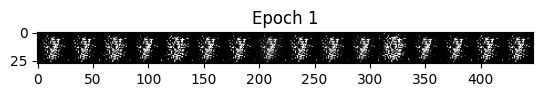

Epoch [2/20] Batch 0/469 Loss D: 1.4150, Loss G: 0.7415, D(x): 0.4839, D(G(z)): 0.4764
Epoch [2/20] Batch 200/469 Loss D: 0.3754, Loss G: 2.6579, D(x): 0.7829, D(G(z)): 0.0949
Epoch [2/20] Batch 400/469 Loss D: 0.2051, Loss G: 3.2831, D(x): 0.8942, D(G(z)): 0.0386


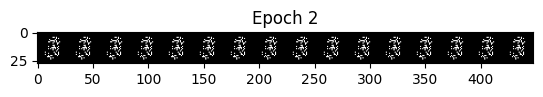

Epoch [3/20] Batch 0/469 Loss D: 0.0067, Loss G: 5.7662, D(x): 0.9965, D(G(z)): 0.0031
Epoch [3/20] Batch 200/469 Loss D: 0.0022, Loss G: 7.0721, D(x): 0.9987, D(G(z)): 0.0008
Epoch [3/20] Batch 400/469 Loss D: 0.0007, Loss G: 8.0750, D(x): 0.9996, D(G(z)): 0.0003


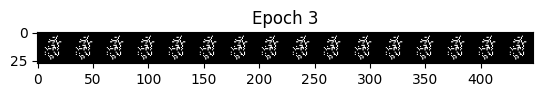

Epoch [4/20] Batch 0/469 Loss D: 0.0005, Loss G: 8.2882, D(x): 0.9997, D(G(z)): 0.0003
Epoch [4/20] Batch 200/469 Loss D: 0.0003, Loss G: 8.7746, D(x): 0.9998, D(G(z)): 0.0002
Epoch [4/20] Batch 400/469 Loss D: 0.0003, Loss G: 8.7636, D(x): 0.9999, D(G(z)): 0.0002


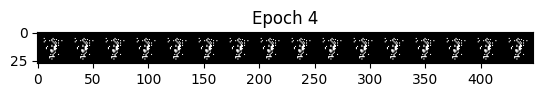

Epoch [5/20] Batch 0/469 Loss D: 0.0130, Loss G: 5.0567, D(x): 0.9948, D(G(z)): 0.0064
Epoch [5/20] Batch 200/469 Loss D: 0.0008, Loss G: 7.6062, D(x): 0.9997, D(G(z)): 0.0005
Epoch [5/20] Batch 400/469 Loss D: 0.0002, Loss G: 8.9327, D(x): 0.9999, D(G(z)): 0.0001


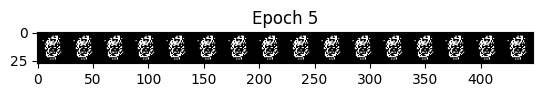

Epoch [6/20] Batch 0/469 Loss D: 0.0002, Loss G: 9.2589, D(x): 0.9999, D(G(z)): 0.0001
Epoch [6/20] Batch 200/469 Loss D: 0.0001, Loss G: 9.7588, D(x): 0.9999, D(G(z)): 0.0001
Epoch [6/20] Batch 400/469 Loss D: 0.0001, Loss G: 10.1106, D(x): 1.0000, D(G(z)): 0.0000


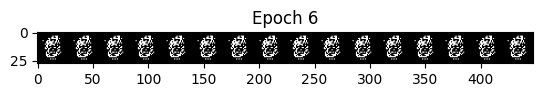

Epoch [7/20] Batch 0/469 Loss D: 0.0001, Loss G: 9.9828, D(x): 1.0000, D(G(z)): 0.0000
Epoch [7/20] Batch 200/469 Loss D: 0.0002, Loss G: 9.0771, D(x): 0.9999, D(G(z)): 0.0001
Epoch [7/20] Batch 400/469 Loss D: 0.0001, Loss G: 10.2592, D(x): 0.9999, D(G(z)): 0.0000


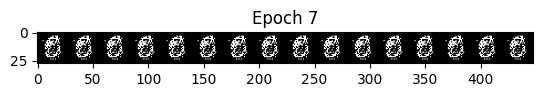

Epoch [8/20] Batch 0/469 Loss D: 0.0001, Loss G: 10.4163, D(x): 1.0000, D(G(z)): 0.0000
Epoch [8/20] Batch 200/469 Loss D: 0.0000, Loss G: 10.6975, D(x): 1.0000, D(G(z)): 0.0000
Epoch [8/20] Batch 400/469 Loss D: 0.0000, Loss G: 11.0545, D(x): 1.0000, D(G(z)): 0.0000


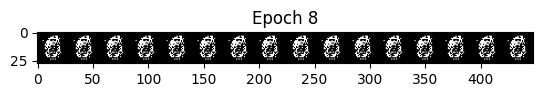

Epoch [9/20] Batch 0/469 Loss D: 0.0000, Loss G: 10.7312, D(x): 1.0000, D(G(z)): 0.0000
Epoch [9/20] Batch 200/469 Loss D: 0.0000, Loss G: 11.2311, D(x): 1.0000, D(G(z)): 0.0000
Epoch [9/20] Batch 400/469 Loss D: 0.0000, Loss G: 11.2695, D(x): 1.0000, D(G(z)): 0.0000


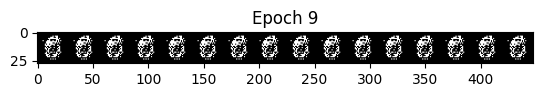

Epoch [10/20] Batch 0/469 Loss D: 0.0000, Loss G: 11.4156, D(x): 1.0000, D(G(z)): 0.0000
Epoch [10/20] Batch 200/469 Loss D: 0.0000, Loss G: 11.6945, D(x): 1.0000, D(G(z)): 0.0000
Epoch [10/20] Batch 400/469 Loss D: 0.0000, Loss G: 11.8783, D(x): 1.0000, D(G(z)): 0.0000


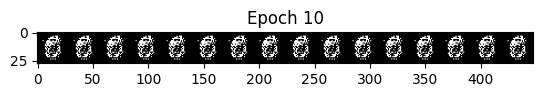

Epoch [11/20] Batch 0/469 Loss D: 0.0000, Loss G: 11.9671, D(x): 1.0000, D(G(z)): 0.0000
Epoch [11/20] Batch 200/469 Loss D: 0.0000, Loss G: 12.1509, D(x): 1.0000, D(G(z)): 0.0000
Epoch [11/20] Batch 400/469 Loss D: 0.0000, Loss G: 12.3223, D(x): 1.0000, D(G(z)): 0.0000


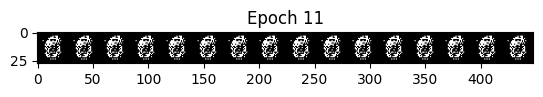

Epoch [12/20] Batch 0/469 Loss D: 0.0000, Loss G: 12.3732, D(x): 1.0000, D(G(z)): 0.0000
Epoch [12/20] Batch 200/469 Loss D: 0.0000, Loss G: 12.5530, D(x): 1.0000, D(G(z)): 0.0000
Epoch [12/20] Batch 400/469 Loss D: 0.0000, Loss G: 12.6921, D(x): 1.0000, D(G(z)): 0.0000


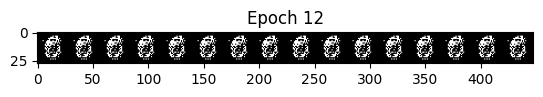

Epoch [13/20] Batch 0/469 Loss D: 0.0000, Loss G: 12.7372, D(x): 1.0000, D(G(z)): 0.0000
Epoch [13/20] Batch 200/469 Loss D: 0.0000, Loss G: 12.8925, D(x): 1.0000, D(G(z)): 0.0000
Epoch [13/20] Batch 400/469 Loss D: 0.0000, Loss G: 12.9702, D(x): 1.0000, D(G(z)): 0.0000


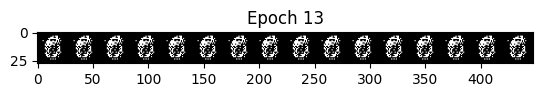

Epoch [14/20] Batch 0/469 Loss D: 0.0000, Loss G: 13.0291, D(x): 1.0000, D(G(z)): 0.0000
Epoch [14/20] Batch 200/469 Loss D: 0.0000, Loss G: 13.1801, D(x): 1.0000, D(G(z)): 0.0000
Epoch [14/20] Batch 400/469 Loss D: 0.0000, Loss G: 13.2794, D(x): 1.0000, D(G(z)): 0.0000


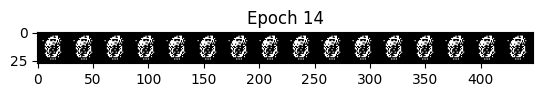

Epoch [15/20] Batch 0/469 Loss D: 0.0000, Loss G: 13.3204, D(x): 1.0000, D(G(z)): 0.0000
Epoch [15/20] Batch 200/469 Loss D: 0.0000, Loss G: 13.4569, D(x): 1.0000, D(G(z)): 0.0000
Epoch [15/20] Batch 400/469 Loss D: 0.0000, Loss G: 13.5867, D(x): 1.0000, D(G(z)): 0.0000


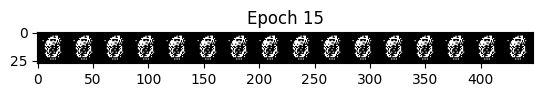

Epoch [16/20] Batch 0/469 Loss D: 0.0000, Loss G: 13.6444, D(x): 1.0000, D(G(z)): 0.0000
Epoch [16/20] Batch 200/469 Loss D: 0.0000, Loss G: 13.7672, D(x): 1.0000, D(G(z)): 0.0000
Epoch [16/20] Batch 400/469 Loss D: 0.0212, Loss G: 4.7105, D(x): 0.9938, D(G(z)): 0.0095


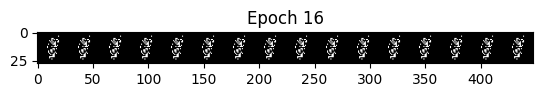

Epoch [17/20] Batch 0/469 Loss D: 0.0020, Loss G: 7.1871, D(x): 0.9987, D(G(z)): 0.0008
Epoch [17/20] Batch 200/469 Loss D: 0.0003, Loss G: 8.8920, D(x): 0.9998, D(G(z)): 0.0001
Epoch [17/20] Batch 400/469 Loss D: 0.0001, Loss G: 9.8891, D(x): 0.9999, D(G(z)): 0.0001


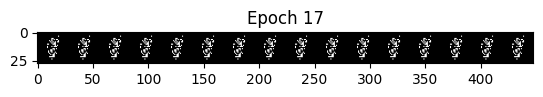

Epoch [18/20] Batch 0/469 Loss D: 0.0001, Loss G: 10.0870, D(x): 0.9999, D(G(z)): 0.0000
Epoch [18/20] Batch 200/469 Loss D: 0.0055, Loss G: 7.5612, D(x): 0.9994, D(G(z)): 0.0009
Epoch [18/20] Batch 400/469 Loss D: 0.0002, Loss G: 9.2764, D(x): 0.9999, D(G(z)): 0.0001


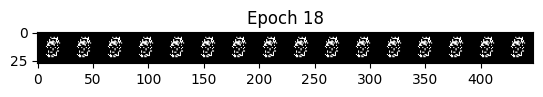

Epoch [19/20] Batch 0/469 Loss D: 0.0002, Loss G: 9.5320, D(x): 0.9999, D(G(z)): 0.0001
Epoch [19/20] Batch 200/469 Loss D: 0.0002, Loss G: 9.3252, D(x): 0.9999, D(G(z)): 0.0001
Epoch [19/20] Batch 400/469 Loss D: 0.0002, Loss G: 9.0683, D(x): 0.9999, D(G(z)): 0.0001


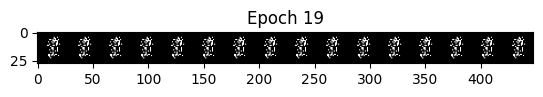

Epoch [20/20] Batch 0/469 Loss D: 0.0002, Loss G: 9.3155, D(x): 0.9999, D(G(z)): 0.0001
Epoch [20/20] Batch 200/469 Loss D: 0.0001, Loss G: 10.2026, D(x): 1.0000, D(G(z)): 0.0000
Epoch [20/20] Batch 400/469 Loss D: 0.0001, Loss G: 10.7196, D(x): 0.9999, D(G(z)): 0.0000


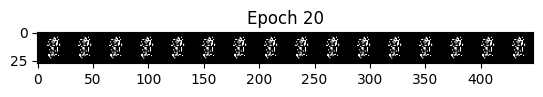

In [7]:
epochs = 20
losses_G = [] # List of avg values per epoch
losses_D = [] 

for epoch in range(epochs):
    epoch_losses_G = []
    epoch_losses_D = []
    for batch_idx, (real_imgs, _) in enumerate(trainloader):
        real_imgs = real_imgs.view(-1, 784).to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size_curr, 1, device=device)
        fake_labels = torch.zeros(batch_size_curr, 1, device=device)

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)

        D_real = Disc(real_imgs)
        D_fake = Disc(fake_imgs.detach())

        loss_D_real = criterion(D_real, real_labels)
        loss_D_fake = criterion(D_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        optim_d.zero_grad()
        loss_D.backward()
        optim_d.step()

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)
        D_fake = Disc(fake_imgs)

        loss_G = criterion(D_fake, real_labels)

        optim_g.zero_grad()
        loss_G.backward()
        optim_g.step()

        if batch_idx % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {batch_idx}/{len(trainloader)} "
                  f"Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}, "
                  f"D(x): {D_real.mean().item():.4f}, D(G(z)): {D_fake.mean().item():.4f}")
        epoch_losses_D.append(loss_D.item())
        epoch_losses_G.append(loss_G.item())

    losses_D.append(np.mean(np.array(epoch_losses_D)))
    losses_G.append(np.mean(np.array(epoch_losses_G)))

    with torch.no_grad():
        fake_samples = Gen(fixed_noise).view(-1, 1, 28, 28)
        grid = torch.cat([fake_samples[i] for i in range(16)], dim=2)
        plt.imshow(grid.squeeze().cpu().numpy(), cmap="gray")
        plt.title(f"Epoch {epoch+1}")
        plt.show()

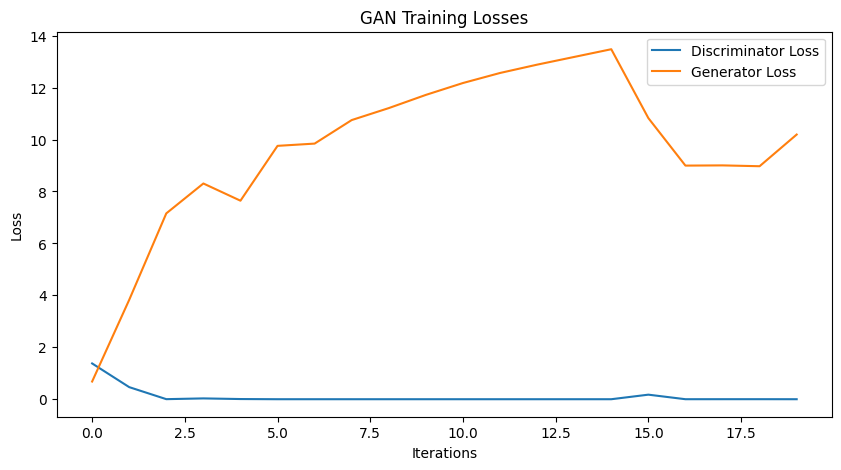

In [8]:
plt.figure(figsize=(10,5))
plt.plot(losses_D, label="Discriminator Loss")
plt.plot(losses_G, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Losses")
plt.legend()
plt.show()

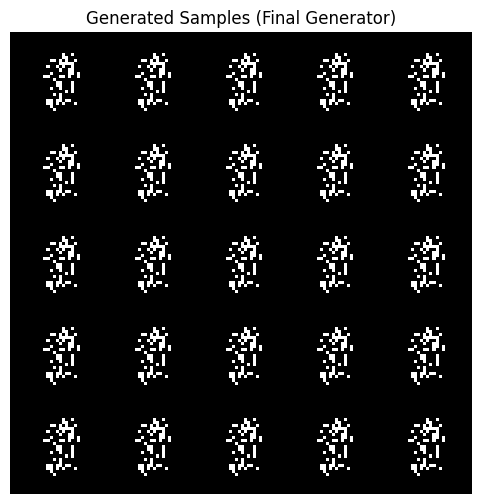

In [9]:
import torchvision.utils as vutils

z = torch.randn(25, 100, device=device)
with torch.no_grad():
    fake_imgs = Gen(z).view(-1, 1, 28, 28)

grid = vutils.make_grid(fake_imgs, nrow=5, normalize=True, value_range=(-1, 1))

plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.axis("off")
plt.title("Generated Samples (Final Generator)")
plt.show()
